***EUR/USD***

           forex currencies     open    close     high      low  num of trades
timestamp                                                                     
2024-10-16          EUR/USD  1.08825  1.08586  1.09014  1.08520         148056
2024-10-17          EUR/USD  1.08585  1.08286  1.08740  1.08110         157719
2024-10-18          EUR/USD  1.08289  1.08670  1.08700  1.08260         142963
2024-10-20          EUR/USD  1.08700  1.08679  1.08700  1.08640           2071
2024-10-21          EUR/USD  1.08680  1.08150  1.08690  1.08099         154449
2024-10-22          EUR/USD  1.08150  1.07940  1.08390  1.07910         152896
2024-10-23          EUR/USD  1.07961  1.07804  1.08070  1.07600         168780
2024-10-24          EUR/USD  1.07804  1.08235  1.08310  1.07700         152416
2024-10-25          EUR/USD  1.08239  1.07950  1.08400  1.07900         153720
2024-10-27          EUR/USD  1.07929  1.07959  1.07999  1.07850           2961
2024-10-28          EUR/USD  1.07958  1.08176  1.082

/var/folders/xq/kq7xhy912x18034bc6bv935m0000gn/T/ipykernel_13464/1087687341.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_election_period['volatility'] = (df_election_period['high'] - df_election_period['low']) / df_election_period['low'] * 100


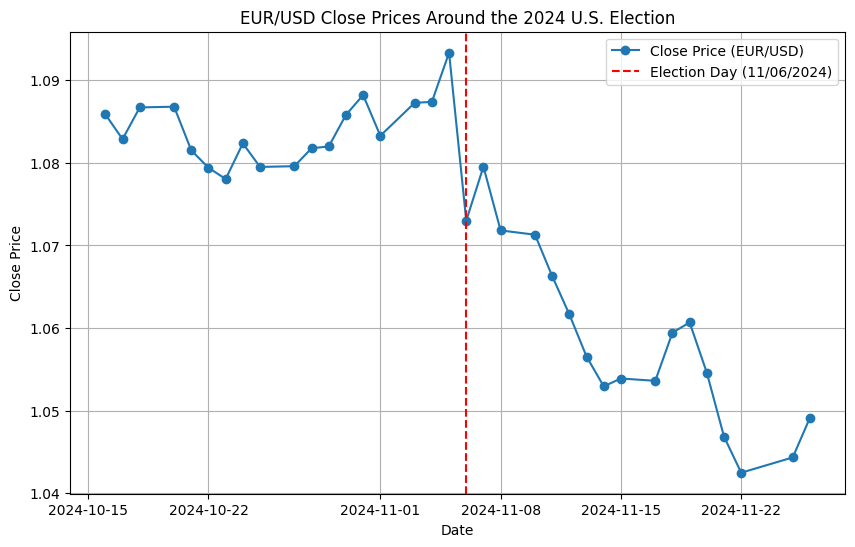

Volatility around the election:
            volatility  num of trades
timestamp                            
2024-10-16    0.455216         148056
2024-10-17    0.582740         157719
2024-10-18    0.406429         142963
2024-10-20    0.055228           2071
2024-10-21    0.546721         154449
2024-10-22    0.444815         152896
2024-10-23    0.436803         168780
2024-10-24    0.566388         152416
2024-10-25    0.463392         153720
2024-10-27    0.138155           2961
2024-10-28    0.441558         138370
2024-10-29    0.629264         177682
2024-10-30    0.606117         174129
2024-10-31    0.433499         187084
2024-11-01    0.733406         170533
2024-11-03    0.091070           2665
2024-11-04    0.432462         162530
2024-11-05    0.625517         150235
2024-11-06    2.359109         287325
2024-11-07    1.064326         201771
2024-11-08    1.041550         188220
2024-11-10    0.119581           2518
2024-11-11    0.942810         164290
2024-11-12    0.67

In [9]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

key = "H6nwGL81MzkISINfYyhEyibHX1y7pt1X"
headers = {"Authentication": "Bearer " + key}
url = f"https://api.polygon.io/v2/aggs/ticker/C:EURUSD/range/1/day/2024-10-16/2024-11-26?adjusted=true&sort=asc&apiKey={key}"

# Make the API request
req = requests.get(url, headers=headers)
result = json.loads(req.text)

# Check if the results are present
if 'results' in result:
    data = result['results']
    
    # Create a list to store rows
    rows = []
    
    # Iterate through the results and collect data
    for entry in data:
        rows.append({
            'forex currencies': 'EUR/USD',
            'open': entry['o'],
            'close': entry['c'],
            'high': entry['h'],
            'low': entry['l'],
            'timestamp': entry['t'],  # Leave as epoch for now
            'num of trades': entry['n']
        })
    
    # Convert the list of rows into a DataFrame
    df_eur = pd.DataFrame(rows)
    
    # Convert 'timestamp' to a readable datetime format
    df_eur['timestamp'] = pd.to_datetime(df_eur['timestamp'], unit='ms')
    
    # Set 'timestamp' as the index
    df_eur.set_index('timestamp', inplace=True)
    
    print(df_eur)
else:
    print("No results found in the API response.")


# Filter data 5 days before and after the election
start_date = '2024-10-16'
end_date = '2024-11-26'
df_election_period = df_eur.loc[start_date:end_date]

# Calculate volatility
df_election_period['volatility'] = (df_election_period['high'] - df_election_period['low']) / df_election_period['low'] * 100

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_election_period.index, df_election_period['close'], label='Close Price (EUR/USD)', marker='o')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='Election Day (11/06/2024)')
plt.title('EUR/USD Close Prices Around the 2024 U.S. Election')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Check if there's a spike in volatility or volume
print("Volatility around the election:")
print(df_election_period[['volatility', 'num of trades']])
# Save the DataFrame to a CSV file
df_eur.to_csv('eur_usd_data.csv', index=True)


***GBP/USD***

/var/folders/xq/kq7xhy912x18034bc6bv935m0000gn/T/ipykernel_13464/3890692848.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_election_period['volatility'] = (df_election_period['high'] - df_election_period['low']) / df_election_period['low'] * 100


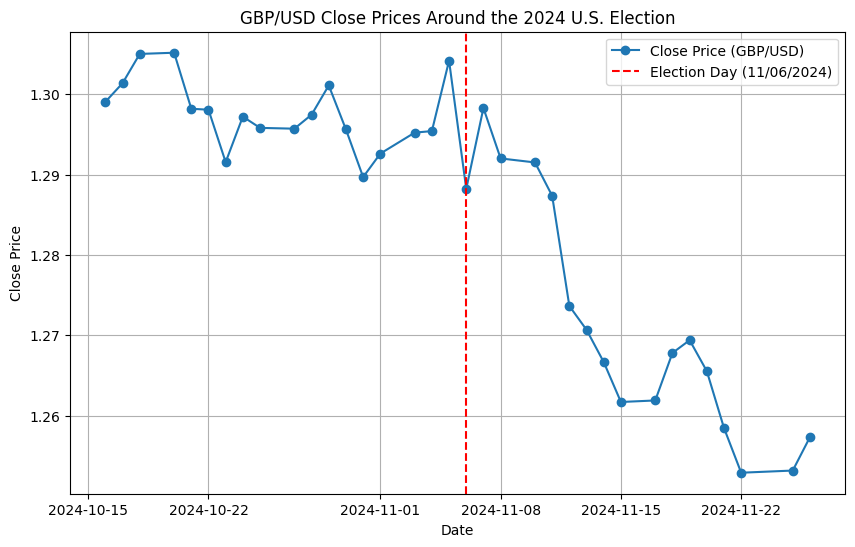

Volatility and trade volume around the election:
            volatility  num of trades
timestamp                            
2024-10-16    0.787669         167472
2024-10-17    0.386958         179702
2024-10-18    0.468870         164671
2024-10-20    0.079718           2147
2024-10-21    0.601156         161653
2024-10-22    0.556285         173910
2024-10-23    0.689602         175715
2024-10-24    0.604957         174932
2024-10-25    0.347383         161438
2024-10-27    0.110377           2888
2024-10-28    0.489256         150956
2024-10-29    0.471596         179227
2024-10-30    0.840382         189077
2024-10-31    1.220120         199662
2024-11-01    1.809497         173700
2024-11-03    0.159088           2403
2024-11-04    0.510322         176350
2024-11-05    0.791002         166060
2024-11-06    1.626928         291976
2024-11-07    1.049402         216138
2024-11-08    0.793306         188503
2024-11-10    0.123244           1344
2024-11-11    0.560137         164343
2

In [10]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# API request details
key = "H6nwGL81MzkISINfYyhEyibHX1y7pt1X"
headers = {"Authentication": "Bearer " + key}
url = f"https://api.polygon.io/v2/aggs/ticker/C:GBPUSD/range/1/day/2024-10-16/2024-11-26?adjusted=true&sort=asc&apiKey={key}"

# Make the API request
req = requests.get(url, headers=headers)
result = json.loads(req.text)

# Check if the results are present
if 'results' in result:
    data = result['results']
    
    # Create a list to store rows
    rows = []
    
    # Iterate through the results and collect data
    for entry in data:
        rows.append({
            'forex currencies': 'GBP/USD',
            'open': entry['o'],
            'close': entry['c'],
            'high': entry['h'],
            'low': entry['l'],
            'timestamp': entry['t'],  # Leave as epoch for now
            'num of trades': entry['n']
        })
    
    # Convert the list of rows into a DataFrame
    df_gbp = pd.DataFrame(rows)
    
    # Convert 'timestamp' to a readable datetime format
    df_gbp['timestamp'] = pd.to_datetime(df_gbp['timestamp'], unit='ms')
    
    # Set 'timestamp' as the index
    df_gbp.set_index('timestamp', inplace=True)
    
    # Filter data 5 days before and after the election
    start_date = '2024-10-16'
    end_date = '2024-11-26'
    df_election_period = df_gbp.loc[start_date:end_date]

    # Calculate volatility
    df_election_period['volatility'] = (df_election_period['high'] - df_election_period['low']) / df_election_period['low'] * 100

    # Plot Close Price Around the Election
    plt.figure(figsize=(10, 6))
    plt.plot(df_election_period.index, df_election_period['close'], label='Close Price (GBP/USD)', marker='o')
    plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='Election Day (11/06/2024)')
    plt.title('GBP/USD Close Prices Around the 2024 U.S. Election')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Print volatility and trade volume
    print("Volatility and trade volume around the election:")
    print(df_election_period[['volatility', 'num of trades']])
else:
    print("No results found in the API response.")

df_gbp.to_csv('gbp_usd_data.csv', index=True)

***JPY/USD***

/var/folders/xq/kq7xhy912x18034bc6bv935m0000gn/T/ipykernel_13464/864832886.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_election_period['volatility'] = (df_election_period['high'] - df_election_period['low']) / df_election_period['low'] * 100


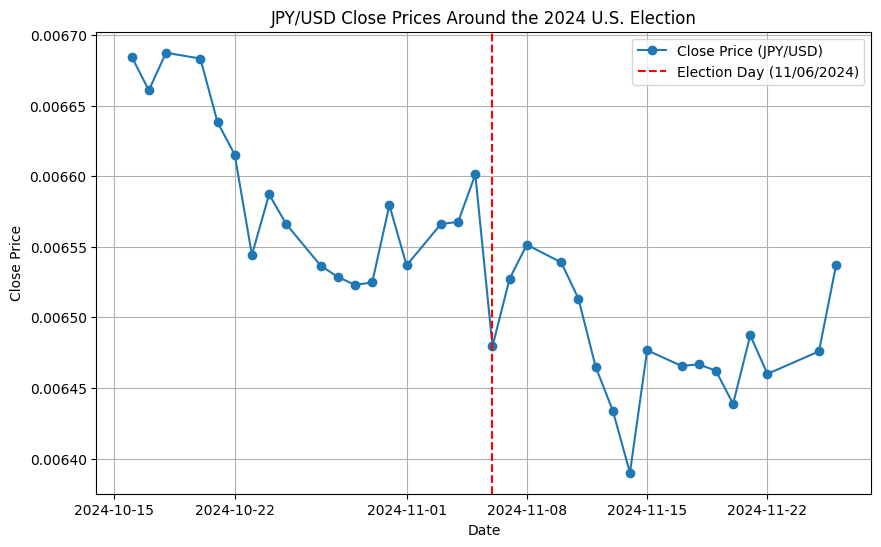

Volatility and trade volume around the election:
            volatility  num of trades
timestamp                            
2024-10-16    0.806306           4264
2024-10-17    0.896673           4197
2024-10-18    0.527640           3722
2024-10-20    0.132840            298
2024-10-21    1.312811           4287
2024-10-22    0.504182           4194
2024-10-23    1.467791           4204
2024-10-24    0.884906           3970
2024-10-25    0.649680           3767
2024-10-27    0.472135            464
2024-10-28    1.083205           4278
2024-10-29    0.717945           4304
2024-10-30    0.524073           4304
2024-10-31    1.339916           4393
2024-11-01    1.019742           3835
2024-11-03    0.368369            340
2024-11-04    0.581312           4013
2024-11-05    1.020209           4038
2024-11-06    2.292860           4411
2024-11-07    1.365141           4376
2024-11-08    0.954824           4013
2024-11-10    0.219318            344
2024-11-11    0.785707           4270
2

In [11]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# API request details
key = "H6nwGL81MzkISINfYyhEyibHX1y7pt1X"
headers = {"Authentication": "Bearer " + key}
url = f"https://api.polygon.io/v2/aggs/ticker/C:JPYUSD/range/1/day/2024-10-16/2024-11-26?adjusted=true&sort=asc&apiKey={key}"

# Make the API request
req = requests.get(url, headers=headers)
result = json.loads(req.text)

# Check if the results are present
if 'results' in result:
    data = result['results']
    
    # Create a list to store rows
    rows = []
    
    # Iterate through the results and collect data
    for entry in data:
        rows.append({
            'forex currencies': 'JPY/USD',
            'open': entry['o'],
            'close': entry['c'],
            'high': entry['h'],
            'low': entry['l'],
            'timestamp': entry['t'],  # Leave as epoch for now
            'num of trades': entry['n']
        })
    
    # Convert the list of rows into a DataFrame
    df_jpy = pd.DataFrame(rows)
    
    # Convert 'timestamp' to a readable datetime format
    df_jpy['timestamp'] = pd.to_datetime(df_jpy['timestamp'], unit='ms')
    
    # Set 'timestamp' as the index
    df_jpy.set_index('timestamp', inplace=True)
    
    # Filter data 5 days before and after the election
    start_date = '2024-10-16'
    end_date = '2024-11-26'
    df_election_period = df_jpy.loc[start_date:end_date]

    # Calculate volatility
    df_election_period['volatility'] = (df_election_period['high'] - df_election_period['low']) / df_election_period['low'] * 100

    # Plot Close Price Around the Election
    plt.figure(figsize=(10, 6))
    plt.plot(df_election_period.index, df_election_period['close'], label='Close Price (JPY/USD)', marker='o')
    plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='Election Day (11/06/2024)')
    plt.title('JPY/USD Close Prices Around the 2024 U.S. Election')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Print volatility and trade volume
    print("Volatility and trade volume around the election:")
    print(df_election_period[['volatility', 'num of trades']])
else:
    print("No results found in the API response.")

df_jpy.to_csv('jpy_usd_data.csv', index=True)